# Continuous Assessment 1

## Completed by C1840386

### Option 2: Epidemics

### Question 1: Explain the meaning of the equations. What do  β ,  γ , and  N  represent?

β is the average number of contacts per person per time, mutliplied by the probablity of someone contracting the disease from an infectious individual.

$\gamma$ is the recovery rate.

N is the sum of S, I and R, where S is the susceptible population, I is the infectious population, and R is the removed population. R refers to population removed via death or recovering and gaining immunity.

### Question 2: If  I0  is the initial percentage of the population infected, which are the initial conditions?

Assuming I0 = 0.1%, and taking N to be the total population of 100%, so 1, the initial conditions follow this equation.

$$
N = S + I + R
$$

We know R as zero initially, as no one has recovered/died from the pandemic at the start. The susceptible population S will be equal to N - I, so 0.99.

Hence, R = 0, N = 1, I0 is presently unknown. Time t is zero also as it is at the start of the pandemic.

### Question 3: Solve the system of equations using the fourth order Runge - Kutta method and assuming the following parameters representing Covid-19:  β=0.14  and  γ=14  days. Plot the evolution of S, I, and R as a function of time for the first 300 days (assume that 0.1% of the population is initially infected).

The fourth order Runge-Kutta method is given by this equation

$$
\frac{\mathrm{dx} }{\mathrm{d} y} = f(x, y),y(0)= y_o 
$$

To implement this, a function will be defined containing all the variables required. It will allow for arguments of p, the initial population which are vaccinated, and the amount of days. This will be useful for when the function is used for question 4.

In [1]:
#Define Fourth Order Runge Kutta
def FourthOrderRungeKutta(p=0, days=300):
    '''
    ------------------------------------------------
    This function is designed in order to solve the 
    SIR model equations using a fourth order Runge
    Kutta method. It is designed to solve all three
    equations simultaneously, as the equations
    depend on each other.
    
    By using a Second Order Runge Kutta method, and
    extrapolating using the lecture notes, this 
    function was formed.
    
    All variables and such are defined within the
    function as they are assumed to be non
    changing (apart from p and days).
    
    Arguments taken:
        p: Amount of vaccinated population, 
           in decimal form. I.e 10% vaccinated
           would equal 0.1. Default value = 0.
            
        days: Amount of time the simulation is
              to run for. Default value = 300.
              
    References:
    
    [1] - https://www.mdpi.com/2227-7390/8/7/1174/htm
            
    ------------------------------------------------
    '''
    
    #Define fixed variables
    global N
    N = 1 #Total population
    i = 0.001 #Initial infected population of 0.1% of the total population
    r = p #Removed population, via recovery/vaccination
    B=0.14 #Given constant in question
    y=1/14 #Given constant in question
    dt=1 #Time step
    t = 0 #Initial time (zeroth day)
    s = N - (N * i) - p #Initial susceptible population
    
    #Define empty arrays to hold values for t, s, i, and r
    t_array = []
    s_array = []
    i_array = []
    r_array = []
    
    #Begin while loop
    #This code carries out until t = days
    while t <= days:
        #First order
        ks1 = (-1) * (B * s * i) / N
        ki1 = (B * s * i) / N - y * i
        
        #Second order
        s2 = s + (ks1 * dt)
        i2 = i + (ki1 * dt)
        ks2 = (-1) * B * s2 * i2
        ki2 = B * s2 * i2 - y*i2
       
        #Third order
        s3 = s2 + (ks2 * dt)
        i3 = i2 + (ki2 * dt)
        ks3 = (-1) * B * s3 * i3
        ki3 = (B * s3 * i3) - (y * i3)
        
        #Fourth order
        s4 = s3 + (ks3 * dt)
        i4 = i3 + (ki3 * dt)
        ks4 = (-1) * B * s4 * i4
        ki4 = (B * s4 * i4) - (y * i4)
       
        #Get final estimates for s, i and r
        #Step t by the time step given (1 in this scenario)
        s += (1 / 6) * (ks1 + 2 * ks2 + 2 * ks3 + ks4) * dt
        i += (1 / 6) * (ki1 + 2 * ki2 + 2 * ki3 + ki4) * dt
        r = N - s - i #Recovered population is total - susceptible - infected
        t += dt #Increment time step
        
        #Append arrays with new values
        t_array.append(t)
        s_array.append(s)
        i_array.append(i)
        r_array.append(r)
        
    #Return values for t, s, i and r
    return t_array, s_array, i_array, r_array

Using the FourthOrderRungeKutta function, the SIR Model can be plotted by assigning the return values of the function to variables which can then be plotted. The arguments for p and t within the function will be left as default for this question.

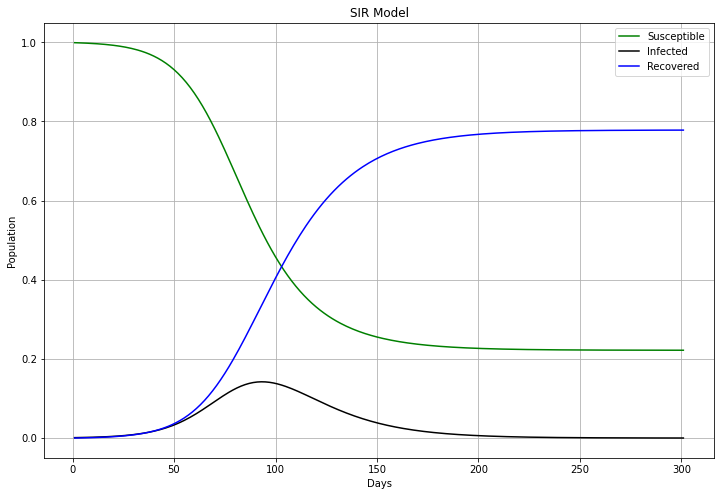

In [2]:
t, s, i, r = FourthOrderRungeKutta(0.0) #t, s, i, r being time array, susceptible array, infected array and recovered
                                        #array respectively.
#Import matplotlib to plot   
import  matplotlib.pyplot as plt

#Plot arrays and format plot
plt.figure(figsize=(12,8))
plt.title("SIR MODEL")
plt.plot(t, s, 'g', label='Susceptible')
plt.plot(t, i, 'k', label='Infected')
plt.plot(t, r, 'b', label='Recovered')
plt.title('SIR Model')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend(loc='best')
plt.grid()

This is the graph generated, assuming 0.1% of the population is initially infected, and no one is vaccinated.

### Question 4: One of the strengths of this simple but informative model is that it allows to study the effects that vaccination may have in the population. Every person that is vaccinated will move straight to the recovered group without becoming infected, which will consequently impact on the overall dynamics. If we consider that a percentage  p  of the population is vaccinated before the start of the pandemic, explain why the initial conditions change to


S(t0) = 1 - I0 - p

I(t0) = I0

R(t0) = p

### Plot the number of infected individuals as a function of time considering  p=0,0.1,0.2,0.3,0.4,0.5  (all in the same figure). Use it to justify that not all people need to be vaccinated to prevent an outbreak. This is known as herd immunity 

The initial value of S changes due to the vaccinated population no longer being part of the susceptible population. The susceptible population is those without vaccination/immunity, and also those who are not infected, hence it is equal to the total population minus the infected population minus the vaccinated population.

The initial value of I0, the initial amount of infected, remains unchanged as the vaccination does not effect how many people begin with the infectious disease.

The initial value of R changes because previously it was zero, however now those that are vaccinated are equivalent to the recovered/immune population. This is because they are no longer at risk of contracting the disease. 

The probability was written into the function used for question 3, hence in order to plot the different levels of vaccination, we can use the function with varying levels of probability. By looping through, all values of p can be plotted upon the same figure quickly.

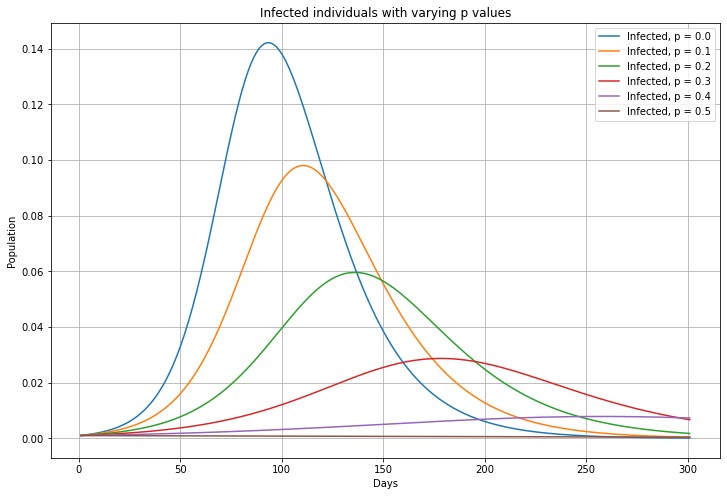

In [3]:
#First, set up plot figure
plt.figure(figsize=(12,8))

#Define p = 0 as start point
p = 0

#Begin while loop for p = 0, 0.1, ..., 0.5
while p <= 0.5:
    #This while loop plots for every value of p in steps of 0.1, starting at 0 and finishing at 0.5
    t, _, i, _ = FourthOrderRungeKutta(p) #Ignore s and r arrays, they are not needed here
           
    #Plot each line
    plt.plot(t, i, label='Infected, p = {:.1f}'.format(p))
    
    #Increment p
    p += 0.1    
        
#Format plot
plt.title('Infected individuals with varying p values')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend(loc='best')
plt.grid()

From the graph, we can see that at p = 0.5, there is almost no infected population for the first 300 days. As such, if 50% of the population were to be vaccinated, there would effectively be no pandemic. This suggests that 50% vaccinated population is sufficient to avoid a dire outbreak. A vaccination rate of over 50% would likely not have a signifcant effect, as 50% vaccination already renders the infected population to be ~0%.

### Question 5: If 5% of the cases require hospitalisation, find the minimum value of  p  that would allow to keep the health system not overloaded. Assume that there are hospital beds for 0.25% of the population (this figure corresponds to England in 2019). Do this empirically by testing different values of  p

In order to complete this question, we will re-use the code from question 4. By multiplying the I values by 5%, and plotting a straight horizontal line at 0.25% of the population N, this will allow us to see which value of p is required for England.

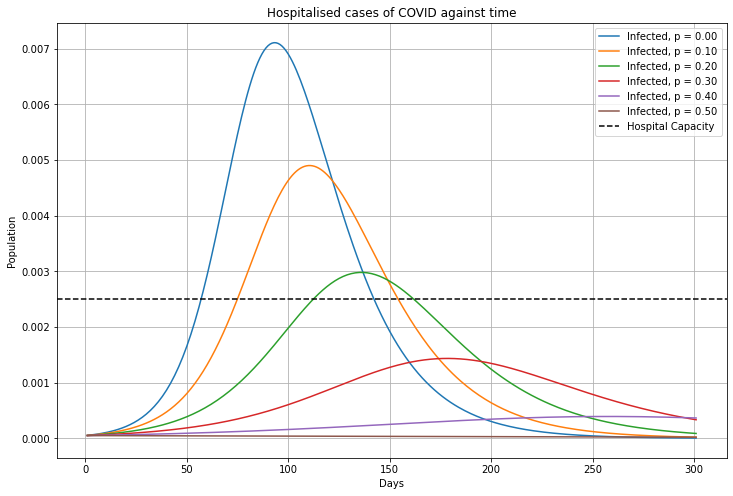

In [4]:
#While loop to generate different values

#Define function to plot vaccination rates with hospital capacity plotted
#Function required as this chunk of code is to be re-used
def Vaccination(p_low = 0, p_high = 0.5, p_increment = 0.1):
    '''
    --------------------------------------------------------
    This function has been defined in order to plot different
    levels of vaccination along with the hospital capacity
    of the UK, where p is vaccination rate.
    
    The hospital capacity is taken to be 0.25% of the total
    population, and the hospitalisation rate of COVID is 
    taken to be 5% of all cases.
    
    Arguments:
        p_low: The value of p to start from.
        
        p_high: The value of p to end on.
        
        p_increment: How much p is incremented by.
    ---------------------------------------------------------
    '''
    #Define p first
    p = p_low
    
    #Set up figure to plot upon
    plt.figure(figsize=(12, 8))
    
    #Begin while loop for p = 0, 
    while p <= p_high:
        #This while loop plots for every value of p in steps of 0.1, starting at 0 and finishing at 0.5
        t, _, i, _ = FourthOrderRungeKutta(p) #Ignore s and r arrays, they are not needed here

        #Multiply all entries in i by 5% (0.05)
        for index in range(len(i)):
            i[index] *= 0.05

        #Plot lines
        plt.plot(t, i, label='Infected, p = {:.2f}'.format(p))
        p += p_increment
    
    #Plot straight horizontal line at 0.25*N
    plt.axhline(y = 0.0025 * N, color='k', linestyle='--', label='Hospital Capacity')

    #Format rest of plot
    plt.title('Hospitalised cases of COVID against time')
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.legend(loc='best')
    plt.grid()
    
#Call function with default values
Vaccination()

From plotting this graph, we can see that potentially the minimum vaccination rate is 30%. However, the curve for p = 0.3 actually sits well below the hospital capacity line. Due to this, we will repeat this step, but with a range of p values from 0.2 to 0.3 to see exactly what the minimum vaccination rate is.

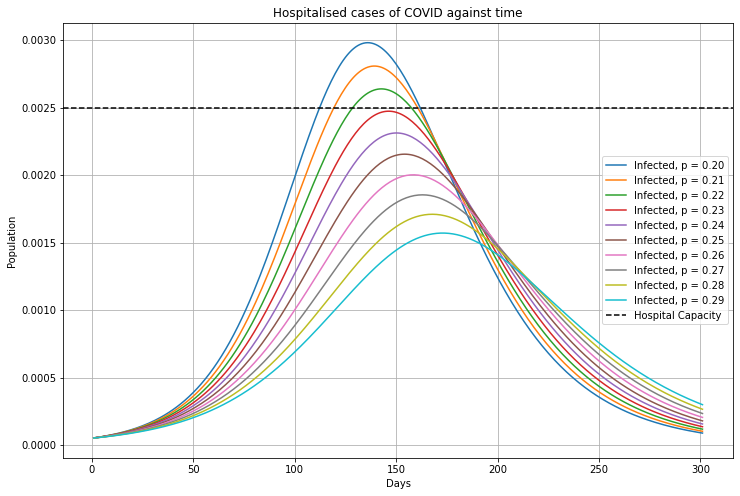

In [5]:
#Call vaccination function, but with p_low = 0.2, p_high = 0.3, and p_increment = 0.01
Vaccination(0.2, 0.3, 0.01)

From the latest graph, we find a much clearer picture of the minimum vaccination required. The red line, p = 0.23, comes just below the hospital capacity line. Due to this, we can say that the absolute minimum vaccination required is 23% of the population, in order to not overload the hospital system. This is assuming hospital capacity remains constant at 0.25% of the population, and 5% of COVID cases require hospitalisation.

### Question 6: The SIR model shows us that the epidemics will cease with time. However, a proportion of individuals will have contracted the disease by the time it has finished. We are interested in finding the cumulative number of people that contracted the disease as a function of time, either via vaccination or another individual. This is nothing else than
<br />
$$
\int_0^t \gamma I(\tau) d\tau.
$$
<br />


### Write a callable function in Python computing this integral with the trapezium method, and use it to plot the cumulative number of infected individuals as a function of time for the values of  p  given in the previous question. How many individuals have been infected in each case after the epidemic finished?

First, a function will be written to compute the area of a trapezium. This will then be used within a loop to populate an array with entries

Total amount infected at p = 0.0 is 0.78 people
Total amount infected at p = 0.1 is 0.74 people
Total amount infected at p = 0.2 is 0.69 people
Total amount infected at p = 0.3 is 0.62 people
Total amount infected at p = 0.4 is 0.50 people
Total amount infected at p = 0.5 is 0.52 people


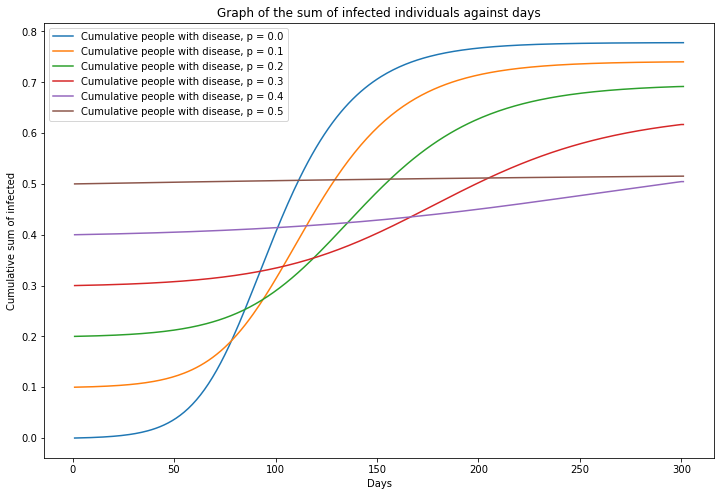

In [6]:
#Import numpy as np
import numpy as np

#Trapezium area function
def TrapeziumArea(y0, y1, h=1):
    '''
    ------------------------------------
    Returns the area of a single
    trapezium.
    
    Arguments:
        y0: First point
        y1: Second point
        h: Width. Default value = 1.
    -------------------------------------
    '''
    return (0.5) * (y0 + y1) * h

#Define helper function for finding trapezium areas
def HelperFunction(array, h=1):
    '''
    -------------------------------------
    Uses TrapeziumArea() function to loop
    through an array and return an array
    of areas.
    
    Arguments:
        array: Array to iterate over.
        h: Width of trapeziums. 
           Default value = 1.
    -------------------------------------
    '''
    #Make empty array to store values
    holder = np.zeros(len(array))
    
    #Loop through computing areas
    for index in range(len(array)):
        if index < len(array) - 1:
            holder[index] = TrapeziumArea(array[index], array[index+1], h)
    return holder

#Define final function to plot cumulative sum of trapezium integrals, using helper functions of TrapeziumArea and HelperFunction
def CumulativeTrapeziumAreaPlot():
    '''
    -------------------------------------
    No arguments are needed for this 
    function due to the fourth order
    function being called to obtain
    arrays full of values.
    
    The Fourth order function is used
    again to obtain new values of i
    for every iteration of the while loop.
    
    It plots 5 lines upon a graph, based on
    the different levels of p.
    
    The function uses HelperFunction, which
    loops through an array computing the 
    area of the trapezium underneath each
    point and returning an array of values.
    
    Arguments:
       None.
    -------------------------------------
    '''
    #Define p and y (gamma)
    p = 0
    y = (1/14)
    
    #Make figure to plot upon
    plt.figure(figsize=(12, 8))
    
    #Begin while loop to utilise different values of p
    while p <= 0.5:
        #Obtain values for t and i
        t, s, i, r = FourthOrderRungeKutta(p)
        
        #Set i to be equal to i * y
        i = np.array(i) * y
        
        #Set first entry in i to be equal to vaccination amount, as in this situation vaccinated individuals = infected 
        
        #Use HelperFunction to obtain holder array
        temporaryValues = HelperFunction(i)
        
        #Set first value to p to include vaccinated population
        temporaryValues[0] = p
        
        #Values found for areas, now to plot a cumulative sum against t
        plt.plot(t, np.cumsum(temporaryValues), label='Cumulative people with disease, p = {:.1f}'.format(p))
        
        #Print total infected
        print('Total amount infected at p = {:.1f} is {:.2f} people'.format(p, np.cumsum(temporaryValues)[-1]))
        
        #Increment p
        p += 0.1
    
    #Format plot
    plt.legend(loc='best')
    plt.xlabel('Days')
    plt.ylabel('Cumulative sum of infected')
    plt.title('Graph of the sum of infected individuals against days')

#Call function
CumulativeTrapeziumAreaPlot()
        
    

Counting those that are infected via vaccination or infection, we find these values for the total amount infected at the end of 300 days:<br><br>
Total amount infected at p = 0.0 is 0.78 people <br>
Total amount infected at p = 0.1 is 0.74 people <br>
Total amount infected at p = 0.2 is 0.69 people <br>
Total amount infected at p = 0.3 is 0.62 people <br>
Total amount infected at p = 0.4 is 0.50 people <br>
Total amount infected at p = 0.5 is 0.52 people <br><br>
Given a vaccination rate of 40%, this has the least amount of people being infected via vaccination or infection from an individual. However, given that the vaccinated proportion would be highly unlikely to be hospitalised/die from this vaccination, it is still reccomended to attempt to obtain a higher vaccination rate if possible.
